In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x1 = np.random.uniform(low=-1.0, high=1.0, size=100)
x2 = np.random.uniform(low=-1.0, high=1.0, size=100)
print(x1.shape, x2.shape)

(100,) (100,)


## 01. sigmoid 함수 알아보기


In [3]:
# def => define
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

In [4]:
print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(+9))

0.00012339457598623172
0.5
0.9998766054240137


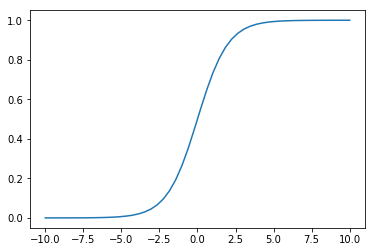

In [5]:
xx = np.linspace(start=-10.0, stop=+10.0)
yy = sigmoid(xx)

plt.plot(xx, yy)

In [6]:
# True == 1, False == 0
y = x1 * 0.3 + x2 * 0.5 + 0.1 + (np.random.uniform(low=-1.0, high=1.0) * 0.2)
y = y >= 0.0

## 02. Gradient Descent Algorithm

In [7]:
num_epoch = 100

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = x1 * w1 + x2 * w2 + b
    y_predict = sigmoid(y_predict)
    
    predict = (y_predict >= 0.5)
    actual = y

    error = (predict != actual).mean()   # 정확도(True, False)
    if error < 0.01:
        break
        
    if epoch % 10 == 0:
        print("{0:2} error = {1:.5f}".format(epoch, error))

    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    b = b - (y_predict - y).mean()
    
print("----" * 10)
print("{0} error = {1:.5f}".format(epoch, error))

 0 error = 0.42000
10 error = 0.03000
20 error = 0.03000
30 error = 0.03000
40 error = 0.03000
50 error = 0.03000
60 error = 0.03000
70 error = 0.03000
80 error = 0.03000
90 error = 0.03000
----------------------------------------
99 error = 0.03000


In [8]:
import pandas as pd

y_predict = x1 * w1 + x2 * w2 + b
y_predict = sigmoid(y_predict)

predict = (y_predict >= 0.5)

pd.DataFrame({'x1': x1, 'x2': x2, 'y(actual)': y, 'y(predict)': predict}).head(10)

,x1,x2,y(actual),y(predict)
0,0.486646,-0.908212,False,False
1,0.674239,-0.592948,False,False
2,0.539089,0.826915,True,True
3,-0.669311,0.618718,True,True
4,-0.577039,-0.247188,False,False
5,0.709329,-0.415394,True,True
6,-0.112309,-0.474394,False,False
7,0.332948,0.228893,True,True
8,-0.204237,0.472928,True,True
9,0.747303,-0.906126,False,False


## 03. MNIST Dataset

In [9]:
# !pip install keras

notebook 5.4.0 requires ipykernel, which is not installed.
jupyter 1.0.0 requires ipykernel, which is not installed.
jupyter-console 5.2.0 requires ipykernel, which is not installed.
ipywidgets 7.1.1 requires ipykernel>=4.5.1, which is not installed.


In [14]:
#!pip install tensorflow

notebook 5.4.0 requires ipykernel, which is not installed.
jupyter 1.0.0 requires ipykernel, which is not installed.
jupyter-console 5.2.0 requires ipykernel, which is not installed.
ipywidgets 7.1.1 requires ipykernel>=4.5.1, which is not installed.


In [10]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()

C:\Users\WITHJS\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


label = [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


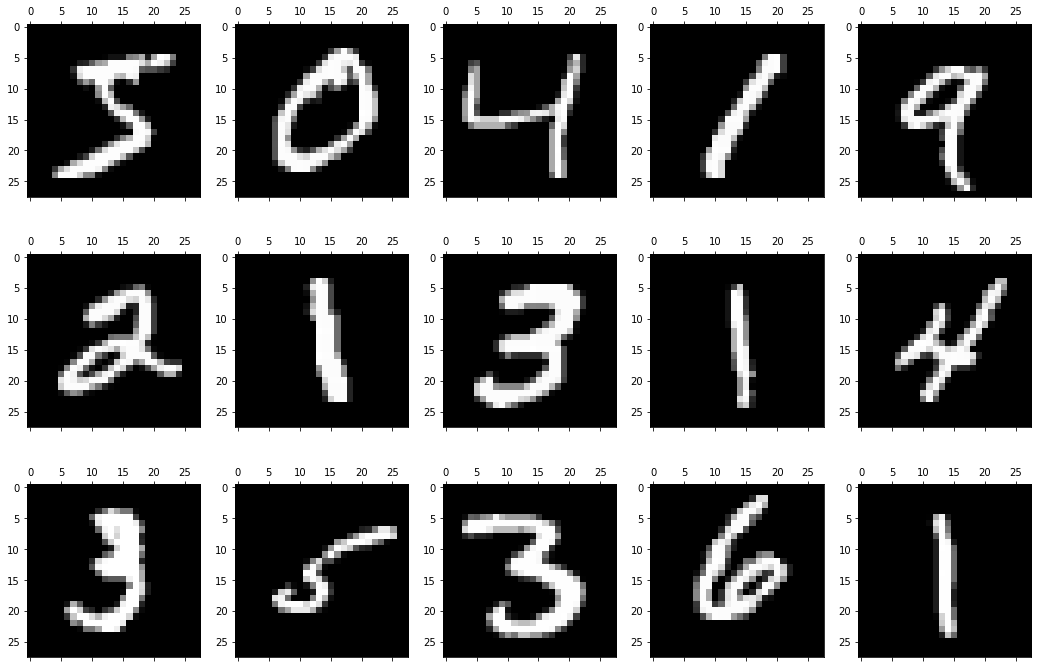

In [11]:
figure, axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18, 12)

plt.gray()

print("label = {0}".format(y_train[0:15]))

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])
axes[2][0].matshow(X_train[10])
axes[2][1].matshow(X_train[11])
axes[2][2].matshow(X_train[12])
axes[2][3].matshow(X_train[13])
axes[2][4].matshow(X_train[14])

## Preprocessing

In [12]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [13]:
y_train_hot = np.eye(10)[y_train]

print(y_train[0:5])
y_train_hot[0:5]
print(y_train_hot.shape, y_train.shape)

[5 0 4 1 9]
(60000, 10) (60000,)


In [14]:
y_test_hot = np.eye(10)[y_test]

print(y_test[0:5])
y_test_hot[0:5]

[7 2 1 0 4]


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

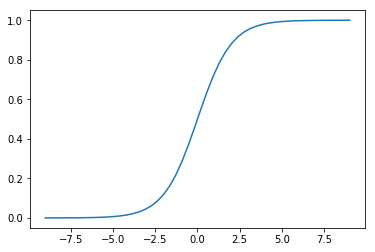

In [16]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9.0, stop=+9.0)
yy = sigmoid(xx)
plt.plot(xx, yy)

## Gradient Descent

In [17]:
num_epoch = 300
learning_rate = 0.0001

w = np.random.uniform(low=0.0, high=1.0, size=(28 * 28, 10))
b = np.random.uniform(low=0.0, high=1.0, size=10)

for epoch in range(num_epoch):
    y_predict_hot = X_train.dot(w) + b
    y_predict_hot = sigmoid(y_predict_hot)    
    y_predict = y_predict_hot.argmax(axis=1)

    error = (y_train != y_predict).mean()
    if error < 0.2:
        break

    if epoch % 30 == 0:
        print("{0:3} error = {1:.5f}".format(epoch, error))
    
    w = w - learning_rate * X_train.T.dot(y_predict_hot - y_train_hot)
    b = b - learning_rate * (y_predict_hot - y_train_hot).mean(axis=0)

print("----" * 10)
print("{0:3} error = {1:.5f}".format(epoch, error))

  0 error = 0.90128


C:\Users\WITHJS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


 30 error = 0.23838
----------------------------------------
 49 error = 0.19813


label = [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


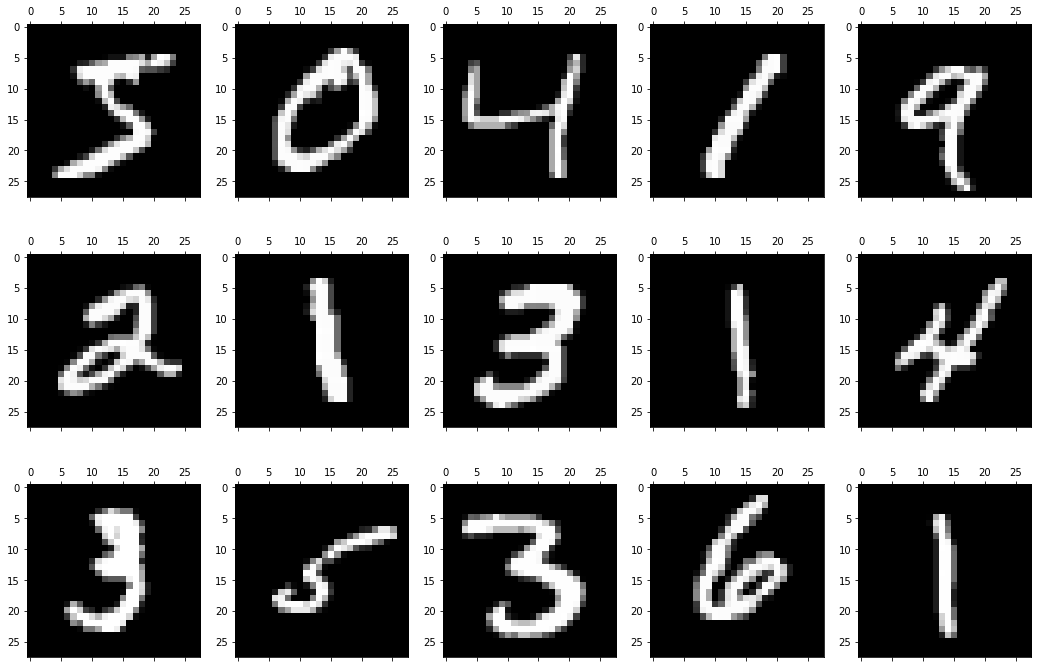

In [18]:
figure, axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18, 12)

plt.gray()

print("label = {0}".format(y_train[0:15]))

axes[0][0].matshow(X_train[0].reshape(28, 28))
axes[0][1].matshow(X_train[1].reshape(28, 28))
axes[0][2].matshow(X_train[2].reshape(28, 28))
axes[0][3].matshow(X_train[3].reshape(28, 28))
axes[0][4].matshow(X_train[4].reshape(28, 28))
axes[1][0].matshow(X_train[5].reshape(28, 28))
axes[1][1].matshow(X_train[6].reshape(28, 28))
axes[1][2].matshow(X_train[7].reshape(28, 28))
axes[1][3].matshow(X_train[8].reshape(28, 28))
axes[1][4].matshow(X_train[9].reshape(28, 28))
axes[2][0].matshow(X_train[10].reshape(28, 28))
axes[2][1].matshow(X_train[11].reshape(28, 28))
axes[2][2].matshow(X_train[12].reshape(28, 28))
axes[2][3].matshow(X_train[13].reshape(28, 28))
axes[2][4].matshow(X_train[14].reshape(28, 28))

In [19]:
y_predict_hot = X_train.dot(w) + b
y_predict_hot = sigmoid(y_predict_hot)    
y_predict = y_predict_hot.argmax(axis=1)

accuracy = (y_train == y_predict).mean()
print("Accuracy = {0:.5f}".format(accuracy))

pd.DataFrame({'y(actual)': y_train, 'y(predict)': y_predict}).head(15)

Accuracy = 0.80187


C:\Users\WITHJS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


,y(actual),y(predict)
0,5,0
1,0,0
2,4,4
3,1,1
4,9,4
5,2,2
6,1,1
7,3,3
8,1,1
9,4,4
